In [26]:
import numpy as np
import scipy as sc
import seaborn as sn 
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, get_sun, get_moonn
from astroplan import Observer
from timezonefinder import TimezoneFinder
from datetime import datetime
from pytz import timezone, utc
from geopy.geocoders import Nominatim
from astropy.time import Time

In [2]:
#Inputs: RA, Dec of the source and name of the place you wish to observe from 
#Paramerters format - ra (hms), dec (dms), name of the place (string)

In [3]:
#lets design a rise, set calculator for any source based on location of the observer 
#For example we can start with Milky way rise and set time at Joshua Tree National Park 

#We will start looking for the RA and DEC of galactic plane 
Source_loc = SkyCoord('12h51m26.282s', '27d07m42.01s', frame='icrs')

In [81]:
#Obtaining geo location (geodetic cordinates) based on name of the place we intend to be at for observing 
# initialize Nominatim API
geolocator = Nominatim(user_agent="geoapiExercises")
  
# input as a geek
obs_loc_name = "Joshua Tree"
print("Location address:", obs_loc_name)
  
# getting Latitude and Longitude
obs_coords = geolocator.geocode(obs_loc_name)
Joshua_tree = EarthLocation(lat=obs_coords.latitude, lon=obs_coords.longitude)
  
print("Latitude and Longitude of the said address:")
print((obs_coords.latitude, obs_coords.longitude, obs_coords.altitude))

Location address: Joshua Tree
Latitude and Longitude of the said address:
(34.1265262, -116.32093491214893, 0.0)


In [82]:
#Calculating UTC timezone offset for the location 

def get_offset(*, lat, lng):
    """
    returns a location's time zone offset from UTC in hours."""
    
    #First step we initialise the timzeone
    tf = TimezoneFinder()
    tf.timezone_at(lng=lng, lat=lat)
    
    #Set the datetime to now and then set the timezone object for the location 
    today = datetime.now()
    tz_target = timezone(tf.certain_timezone_at(lng=lng, lat=lat))
    
    # ATTENTION: tz_target could be None! handle error case
    
    #Then localise the 
    today_target = tz_target.localize(today)
    today_utc = utc.localize(today)
    return (today_utc - today_target).total_seconds() / 3600


observer = {"lat": obs_coords.latitude, "lng": obs_coords.longitude}
utc_offset = get_offset(**observer)

print(hr_offset)

-8.0


In [83]:
source_altaz = Source_loc.transform_to(AltAz(obstime=midnight,location=Joshua_tree))
print(f"Source's Altitude = {source_altaz.alt:.2}")

Source's Altitude = 8.4 deg


In [89]:
midnight = Time('2022-4-15 00:00:00') - utc_offset
delta_midnight = np.linspace(-12, 12, 1000)*u.hour

In [90]:
frame_Apr14night = AltAz(obstime=midnight+delta_midnight,
                          location=Joshua_tree)
source_altazs_Apr14night = Source_loc.transform_to(frame_Apr14night)

In [91]:
source_airmasss_Apr14night = source_altazs_Apr14night.secz

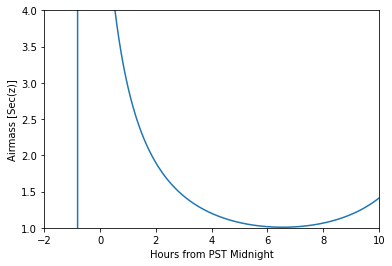

In [92]:
plt.plot(delta_midnight, source_airmasss_Apr14night)
plt.xlim(-2, 10)
plt.ylim(1, 4)
plt.xlabel('Hours from PST Midnight')
plt.ylabel('Airmass [Sec(z)]')
plt.show()

In [93]:
delta_midnight = np.linspace(-12, 12, 1000)*u.hour
times_Apr13_to_14 = midnight + delta_midnight
frame_Apr13_to_14 = AltAz(obstime=times_Apr13_to_14, location=Joshua_tree)
sunaltazs_Apr13_to_14 = get_sun(times_Apr13_to_14).transform_to(frame_Apr13_to_14)

In [94]:
moon_Apr13_to_14 = get_moon(times_Apr13_to_14)
moonaltazs_Apr13_to_14 = moon_Apr13_to_14.transform_to(frame_Apr13_to_14)

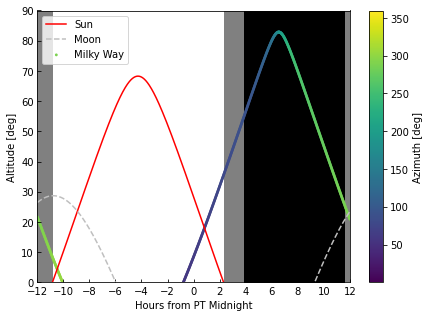

In [116]:
plt.plot(delta_midnight, sunaltazs_Apr13_to_14.alt, color='r', label='Sun')
plt.plot(delta_midnight, moonaltazs_Apr13_to_14.alt, color=[0.75]*3, ls='--', label='Moon')

plt.scatter(delta_midnight, source_altazs_Apr14night.alt,
            c=source_altazs_Apr14night.az, label='Milky Way', lw=0, s=8,
            cmap='viridis')

plt.fill_between(delta_midnight.value, 0, 90,
                sunaltazs_Apr13_to_14.alt.value<0, color='0.5', zorder=0)
plt.fill_between(delta_midnight.value, 0, 90,
                 sunaltazs_Apr13_to_14.alt.value<-18, color='k', zorder=0)

plt.colorbar().set_label('Azimuth [deg]')
plt.xlabel('Hours from PT Midnight')
plt.ylabel('Altitude [deg]')
plt.tick_params(axis="both",direction="in")
plt.xlim(-12, 12)
plt.xticks((np.arange(13)*2-12))
plt.ylim(0, 90)
plt.legend(loc='upper left')
plt.gcf().set_size_inches(7,5)
plt.show()



